In [29]:
import pandas as pd  #dataframe generation
import seaborn as sns  #pairplot
import matplotlib.pyplot as plt #heatmap
%matplotlib inline
from sklearn.ensemble import ExtraTreesRegressor  #feature importance
from sklearn.model_selection import train_test_split  #train test split
from sklearn.ensemble import RandomForestRegressor #model
import numpy as np # used while hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV # used while hyperparameter tuning

In [30]:
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [31]:
df.shape

(301, 9)

In [32]:
#checking unique values of categorical features
print(df['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


In [33]:
print(df['Seller_Type'].unique())

['Dealer' 'Individual']


In [34]:
print(df['Transmission'].unique())

['Manual' 'Automatic']


In [35]:
print(df['Owner'].unique())

[0 1 3]


In [36]:
#checking for null values in the dataset corresponding to each feature
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [37]:
#checking statistical data about the dataset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [38]:
#getting the list of column names in a single place for copy-paste purpose
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [39]:
#drop irrelavant columns
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [40]:
#creating new relevant features such as number of years instead of Year
final_dataset['no_of_years']=2020-final_dataset['Year']
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [41]:
final_dataset.drop(['Year'],axis=1,inplace=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [42]:
#less number of categories so converting using One Hot encoding
#drop_first is used to drop first column to avoid dummy variable trap
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [43]:
#data visualisation using pairplots
#sns.pairplot(final_dataset)

In [44]:
# corrmat=final_dataset.corr()
# top_corr_features=corrmat.index
# plt.figure(figsize=(20,20))
# g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [45]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [46]:
#finalizing dependant and independant variables
#X lies from column loc 1st and onwards
#y lies at 0th loc
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [47]:
X.head()

,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [48]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [49]:
#feature importance
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [50]:
print(model.feature_importances_)

[0.36584645 0.04231556 0.00085852 0.07641127 0.23051034 0.01208764
 0.12824479 0.14372541]


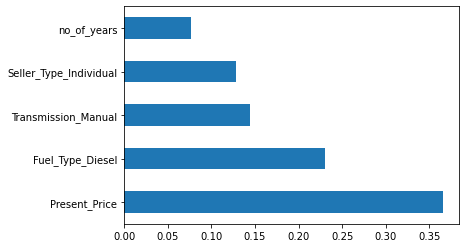

In [51]:
#plotting histogram for the top 5 features which are important
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [52]:
#train test split
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [53]:
X_train.shape

(240, 8)

In [54]:
X_test.shape

(61, 8)

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [56]:
#hyperparameter tuning
n_estimaators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimaators )

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)] 
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start=100,stop=1200,num=12)] 
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [62]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(random_grid)



{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [64]:
rf=RandomForestRegressor()

In [65]:
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=10, scoring='neg_mean_squared_error', n_jobs=1, cv=5, verbose=2, random_state=42,)

In [66]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=1200, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   0.7s
[CV] END max_depth=1200, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   0.7s
[CV] END max_depth=1200, max_features=auto, min_samples_leaf=2, min_samples_split=100,

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [100, 200, 300, 400, 500,
                                                      600, 700, 800, 900, 1000,
                                                      1100, 1200],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [67]:
predictions=rf_random.predict(X_test)
predictions

array([12.54351538,  0.48219896,  0.28536874,  1.15983537,  0.53534607,
        9.13409503,  0.45216699,  3.86379532,  0.56843113, 18.34959292,
        1.2221363 ,  2.61224819,  4.54812924,  0.32386967,  5.10867697,
        5.25549641,  1.14921654,  5.32510235,  4.3517948 , 10.41406525,
        5.57770673,  1.14992859,  4.67879056,  0.51260169,  0.87616829,
        2.93105441,  0.4544895 ,  2.88156774, 11.10870964,  3.13778106,
        0.62249417,  0.46073381,  2.61890919,  7.50940899,  3.30025548,
        4.99574188,  1.16556532,  0.41305247,  0.45230724,  5.72122403,
        2.88315391, 22.3756903 ,  2.80808201,  1.2292944 , 11.06421144,
        4.55957214,  2.6489464 ,  0.33771483,  7.08526403,  0.43063843,
        5.31152305,  5.70202891,  3.59317405,  8.86360176,  2.91988671,
        0.5429046 , 12.76895915, 21.37569508,  3.20516946,  3.80527763,
        7.33795377])

C:\Users\91832\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

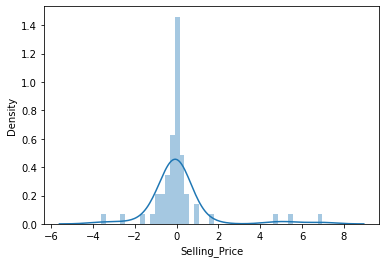

In [68]:
#comparing y_test and the predictions we generated
sns.distplot(y_test-predictions)

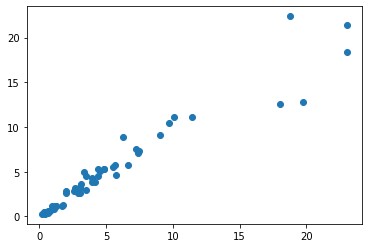

In [69]:
 plt.scatter(y_test,predictions)

In [70]:
import pickle
file = open('random_forest_regression_model.pkl', 'wb')
pickle.dump(rf_random,file)